## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512,activation='relu')(input_layer)
    x = keras.layers.Dense(units=256,activation='relu')(x)
    x = keras.layers.Dense(units=128,activation='relu')(x)
    out = keras.layers.Dense(units=10,activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
"""
Compile 模型
"""
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 40s 805us/step - loss: 2.2675 - acc: 0.1579 - val_loss: 2.2257 - val_acc: 0.1933
Epoch 2/200
50000/50000 [==============================] - 33s 669us/step - loss: 2.1949 - acc: 0.2195 - val_loss: 2.1700 - val_acc: 0.2316
Epoch 3/200
50000/50000 [==============================] - 39s 771us/step - loss: 2.1444 - acc: 0.2459 - val_loss: 2.1249 - val_acc: 0.2535
Epoch 4/200
50000/50000 [==============================] - 43s 851us/step - loss: 2.1022 - acc: 0.2604 - val_loss: 2.0850 - val_acc: 0.2714
Epoch 5/200
50000/50000 [==============================] - 37s 730us/step - loss: 2.0647 - acc: 0.2763 - val_loss: 2.0505 - val_acc: 0.2790
Epoch 6/200
50000/50000 [==============================] - 36s 712us/step - loss: 2.0332 - acc: 0.2873 - val_loss: 2.0225 - val_acc: 0.2902
Epoch 7/200
50000/50000 [==============================] - 34s

Epoch 57/200
50000/50000 [==============================] - 32s 641us/step - loss: 1.6667 - acc: 0.4184 - val_loss: 1.6698 - val_acc: 0.4147
Epoch 58/200
50000/50000 [==============================] - 30s 593us/step - loss: 1.6636 - acc: 0.4197 - val_loss: 1.6684 - val_acc: 0.4149
Epoch 59/200
50000/50000 [==============================] - 29s 589us/step - loss: 1.6608 - acc: 0.4202 - val_loss: 1.6659 - val_acc: 0.4165
Epoch 60/200
50000/50000 [==============================] - 33s 658us/step - loss: 1.6578 - acc: 0.4208 - val_loss: 1.6639 - val_acc: 0.4155
Epoch 61/200
50000/50000 [==============================] - 31s 614us/step - loss: 1.6547 - acc: 0.4229 - val_loss: 1.6622 - val_acc: 0.4167
Epoch 62/200
50000/50000 [==============================] - 30s 598us/step - loss: 1.6519 - acc: 0.4228 - val_loss: 1.6568 - val_acc: 0.4187
Epoch 63/200
50000/50000 [==============================] - 30s 595us/step - loss: 1.6488 - acc: 0.4242 - val_loss: 1.6540 - val_acc: 0.4190
Epoch 64/200


Epoch 115/200
50000/50000 [==============================] - 32s 645us/step - loss: 1.5264 - acc: 0.4690 - val_loss: 1.5466 - val_acc: 0.4573
Epoch 116/200
50000/50000 [==============================] - 29s 585us/step - loss: 1.5245 - acc: 0.4694 - val_loss: 1.5452 - val_acc: 0.4533
Epoch 117/200
50000/50000 [==============================] - 31s 630us/step - loss: 1.5226 - acc: 0.4693 - val_loss: 1.5422 - val_acc: 0.4549
Epoch 118/200
50000/50000 [==============================] - 29s 582us/step - loss: 1.5207 - acc: 0.4701 - val_loss: 1.5423 - val_acc: 0.4576
Epoch 119/200
50000/50000 [==============================] - 30s 607us/step - loss: 1.5185 - acc: 0.4706 - val_loss: 1.5413 - val_acc: 0.4610
Epoch 120/200
50000/50000 [==============================] - 37s 743us/step - loss: 1.5169 - acc: 0.4715 - val_loss: 1.5395 - val_acc: 0.4586
Epoch 121/200
50000/50000 [==============================] - 36s 718us/step - loss: 1.5147 - acc: 0.4715 - val_loss: 1.5353 - val_acc: 0.4605
Epoch 

Epoch 173/200
50000/50000 [==============================] - 22s 443us/step - loss: 1.4278 - acc: 0.5017 - val_loss: 1.4686 - val_acc: 0.4801
Epoch 174/200
50000/50000 [==============================] - 22s 438us/step - loss: 1.4266 - acc: 0.4996 - val_loss: 1.4683 - val_acc: 0.4795
Epoch 175/200
50000/50000 [==============================] - 24s 473us/step - loss: 1.4250 - acc: 0.5021 - val_loss: 1.4751 - val_acc: 0.4725
Epoch 176/200
50000/50000 [==============================] - 25s 491us/step - loss: 1.4233 - acc: 0.5016 - val_loss: 1.4687 - val_acc: 0.4760
Epoch 177/200
50000/50000 [==============================] - 24s 476us/step - loss: 1.4219 - acc: 0.5032 - val_loss: 1.4718 - val_acc: 0.4791
Epoch 178/200
50000/50000 [==============================] - 23s 467us/step - loss: 1.4205 - acc: 0.5030 - val_loss: 1.4670 - val_acc: 0.4794
Epoch 179/200
50000/50000 [==============================] - 23s 470us/step - loss: 1.4192 - acc: 0.5033 - val_loss: 1.4623 - val_acc: 0.4804
Epoch 

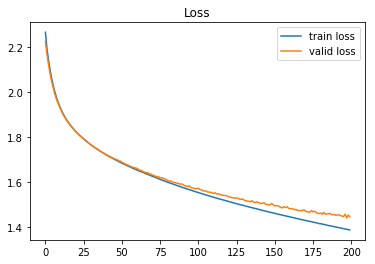

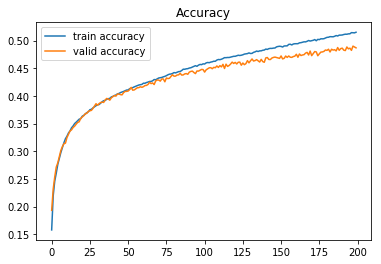

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()